## Navie Bayes in KDB+

In [39]:
/ Example words
positive : "I am happy because I am learning NLP I am happy not sad"
negative : "I am sad because I am learning NLP I am sad not happy"

/Convert the words to symbol list

pos_lis: `$(" " vs positive)
neg_lis: `$(" " vs negative)

show pos_lis
show neg_lis

`I`am`happy`because`I`am`learning`NLP`I`am`happy`not`sad
`I`am`sad`because`I`am`learning`NLP`I`am`sad`not`happy


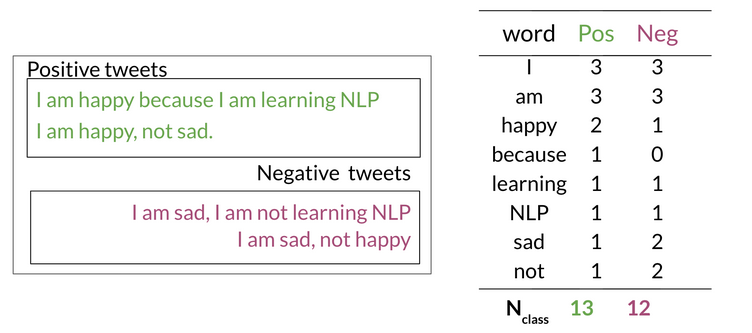

In [30]:
t:([] words: distinct `$((" " vs positive),(" " vs negative)))

In [31]:
update pos +:{x in pos} from 

words   
--------
I       
am      
happy   
because 
learning
NLP     
not     
sad     


In [39]:
{x in pos}'[pos_lis,neg_lis]

[0;31mpos[0m: [0;31mpos[0m

In [42]:
{w:()!(); {$[(x in (key w));w[x]+:1;w[x]:1]}}'[pos_lis,neg_lis]

11111111111111111111111111b
